# 绘制 3D 坐标系

绘制符合如下要求的 3D 坐标系：

1. 绘制 3D 坐标, 绘制 3D 网格, 绘制原点, 绘制 `x`, `y` 和 `z` 三个坐标轴.
2. 通过线段连接坐标轴的端点

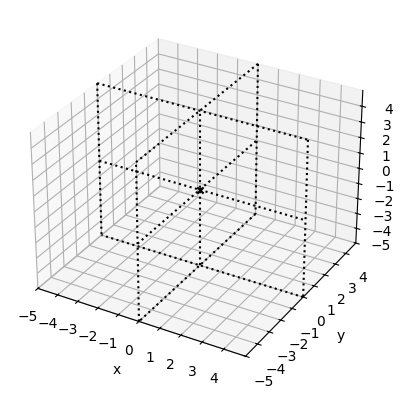

In [13]:
from typing import cast
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np


def draw_line(
    start: tuple[float, float, float],
    end: tuple[float, float, float],
) -> None:
    """绘制 3D 线段

    Args:
        `start` (`Tuple[float, float, float]`): 线段起始位置
        `end` (`Tuple[float, float, float]`): 线段终止位置
    """
    # 将三维坐标转换为三个向量, 分别表示:
    # xs: 线段在 x 轴的起始和终止
    # ys: 线段在 y 轴的起始和终止
    # zs: 线段在 z 轴的起始和终止
    xs, ys, zs = ((start[i], end[i]) for i in range(0, 3))
    # 绘制线段
    ax.plot(xs, ys, zs, color="k", linestyle=":")


# 获取 Figure 对象
fig = plt.gcf()

# 添加一个 3d 坐标系
ax = cast(Axes3D, fig.add_subplot(111, projection="3d"))

# 初始化视图, 设置视角 (即相机位置)
# elev 设置视角沿着 y 轴旋转
# azim 设置视角沿着 z 轴旋转
ax.view_init(elev=None, azim=None)

# 设置坐标轴标签
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# 设置 x 轴值范围
plt.xlim(-5, 5)
# 设置 y 轴值范围
plt.ylim(-5, 5)
# 设置 z 轴值范围
ax.set_zlim(-5, 5)

# 获取三个坐标轴的范围
x, y, z = plt.xlim(), plt.ylim(), ax.get_zlim()

# 定义单位向量
grid = (1, 1, 1)

# 设置 x 轴的刻度, 从 x 轴的起点到终点, 刻度间距 1
plt.xticks(np.arange(x[0], x[1], grid[0]))
# 设置 y 轴的刻度, 从 y 轴的起点到终点, 刻度间距 1
plt.yticks(np.arange(y[0], y[1], grid[1]))

# 设置 z 轴的刻度, 从 z 轴的起点到终点, 刻度间距 1
ax.set_zticks(np.arange(z[0], z[1], grid[2]))  # type: ignore

# 绘制原点
ax.scatter([0], [0], 0, color="k", marker="x")

# 绘制 x 轴坐标轴
draw_line((-5, 0, 0), (5, 0, 0))
# 绘制 y 轴坐标轴
draw_line((0, -5, 0), (0, 5, 0))
# 绘制 z 轴坐标轴
draw_line((0, 0, -5), (0, 0, 5))

# 绘制包围 x 和 z 两个坐标轴的线段
draw_line((-5, 0, 5), (-5, 0, -5))
draw_line((-5, 0, 5), (5, 0, 5))
draw_line((5, 0, 5), (5, 0, -5))
draw_line((5, 0, -5), (-5, 0, -5))

# 绘制包围 y 和 z 两个坐标轴的线段
draw_line((0, -5, -5), (0, -5, 5))
draw_line((0, -5, 5), (0, 5, 5))
draw_line((0, 5, 5), (0, 5, -5))
draw_line((0, 5, -5), (0, -5, -5))

plt.show()